# **Comparison of Traditional and Deep Learning approaches to Univariate Time Series Forecasting on Stocks**

# Load stock data in from Yahoo Finance

We will test the 2 models on 3 different stocks imported from Yahoo Finance. The first is the S&P500, which is an index tracking the top 500 companies in America. The second is Boeing Airlines which is classified as a 'black swan' stock, which is a stock that has an unpredictable event causing drastic changes in prices. The last stock is Nvidia, which is a highly volatile stock.

In [ ]:
!pip install yfinance
import yfinance as yf

# Fetch Stock data
gspc_data = yf.download('^GSPC', start='2013-01-01', end='2023-01-01', progress=False)
nvda_data = yf.download('NVDA', start='2013-01-01', end='2023-01-01', progress=False)
# Boeing is taken from a different time range to encapsulate the 'black swan' event
ba_data = yf.download('BA', start='2011-01-01', end='2021-01-01', progress=False)

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.0 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Table with one of the datasets
gspc_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,1426.189941,1462.430054,1426.189941,1462.420044,1462.420044,4202600000
2013-01-03,1462.420044,1465.469971,1455.530029,1459.369995,1459.369995,3829730000
2013-01-04,1459.369995,1467.939941,1458.989990,1466.469971,1466.469971,3424290000
2013-01-07,1466.469971,1466.469971,1456.619995,1461.890015,1461.890015,3304970000
2013-01-08,1461.890015,1461.890015,1451.640015,1457.150024,1457.150024,3601600000
...,...,...,...,...,...,...
2022-12-23,3815.110107,3845.800049,3797.010010,3844.820068,3844.820068,2819280000
2022-12-27,3843.340088,3846.649902,3813.219971,3829.250000,3829.250000,3030300000
2022-12-28,3829.560059,3848.320068,3780.780029,3783.219971,3783.219971,3083520000


                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2013-01-02  1426.189941  1462.430054  1426.189941  1462.420044  1462.420044   
2013-01-03  1462.420044  1465.469971  1455.530029  1459.369995  1459.369995   
2013-01-04  1459.369995  1467.939941  1458.989990  1466.469971  1466.469971   
2013-01-07  1466.469971  1466.469971  1456.619995  1461.890015  1461.890015   
2013-01-08  1461.890015  1461.890015  1451.640015  1457.150024  1457.150024   

                Volume  
Date                    
2013-01-02  4202600000  
2013-01-03  3829730000  
2013-01-04  3424290000  
2013-01-07  3304970000  
2013-01-08  3601600000  
(2518, 6)
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


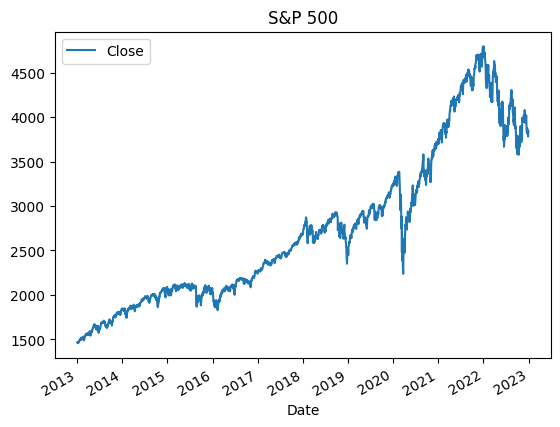

In [ ]:
# GSPC visualisation and metadata
print(gspc_data.head())
print(gspc_data.shape)
print(gspc_data.columns)
gspc_data[['Close']].plot()
plt.title("S&P 500")
plt.show()

              Open    High     Low   Close  Adj Close    Volume
Date                                                           
2013-01-02  3.1400  3.1825  3.1275  3.1800   2.936236  47883600
2013-01-03  3.1800  3.2175  3.1450  3.1825   2.938545  29888800
2013-01-04  3.1875  3.2975  3.1775  3.2875   3.035496  52496800
2013-01-07  3.2850  3.2950  3.1700  3.1925   2.947778  61073200
2013-01-08  3.2000  3.2100  3.1000  3.1225   2.883143  46642400
(2518, 6)
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


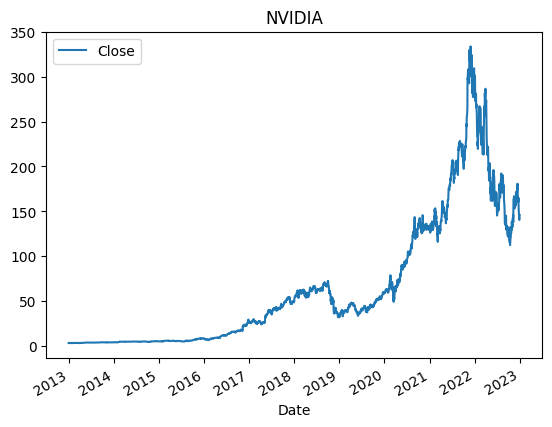

In [ ]:
# NVDA visualisation and metadata
print(nvda_data.head())
print(nvda_data.shape)
print(nvda_data.columns)
nvda_data[['Close']].plot()
plt.title("NVIDIA")
plt.show()

                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2011-01-03  66.150002  66.680000  66.000000  66.400002  53.034527  8072900
2011-01-04  66.790001  67.610001  66.510002  66.940002  53.465828  7979900
2011-01-05  66.550003  67.550003  66.489998  67.480003  53.897137  5890000
2011-01-06  67.459999  69.349998  67.459999  68.800003  54.951435  7507200
2011-01-07  69.160004  70.099998  68.800003  69.379997  55.414688  6797000
(2517, 6)
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


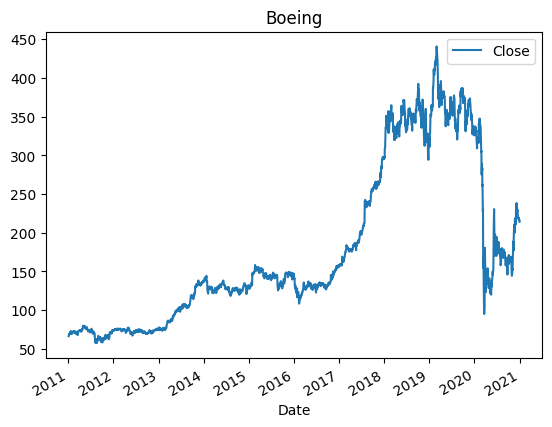

In [ ]:
#  BA visualisation and metadata
print(ba_data.head())
print(ba_data.shape)
print(ba_data.columns)
ba_data[['Close']].plot()
plt.title("Boeing")
plt.show()

# Data pre-processing

## Check for missing values

In [ ]:
print(gspc_data.isnull().sum())
print(ba_data.isnull().sum())
print(nvda_data.isnull().sum())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


## Data pre-processing for ARIMA

The first model to be tested is the traditional time series forecasting model ARIMA (Autoregressive Integrated Moving Average). Input data must be stationary for this model to work effectively, and hence there is a small amount of preprocessing.


In [ ]:
# Check if data is stationary

import pandas as pd
from statsmodels.tsa.stattools import adfuller

def perform_adf_test(series, stock_name):
    result = adfuller(series)
    print(f"Results for {stock_name}:")
    print('------------------------------------------')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    # Based on the p-value, determine if the series is stationary
    if result[1] <= 0.05:
        print(f"{stock_name} Series is stationary")
    else:
        print(f"{stock_name} Series is not stationary")
    print('------------------------------------------\n')

perform_adf_test(gspc_data['Close'], 'GSPC')
perform_adf_test(ba_data['Close'], 'BA')
perform_adf_test(nvda_data['Close'], 'NVDA')

Results for GSPC:
------------------------------------------
ADF Statistic: -1.031209
p-value: 0.741712
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
GSPC Series is not stationary
------------------------------------------

Results for BA:
------------------------------------------
ADF Statistic: -1.434070
p-value: 0.565838
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
BA Series is not stationary
------------------------------------------

Results for NVDA:
------------------------------------------
ADF Statistic: -1.009395
p-value: 0.749822
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
NVDA Series is not stationary
------------------------------------------



The non-stationary data will be adjusted for in the model building segment.

## Data pre-processing for LSTM

The second model we are testing is the deep learning model LSTM (Long short-term memory) which is a type of Recurrent Neural Network specifically designed to handle long-term dependencies in sequential data.

In [ ]:
# Transform data into suitable shape for LSTM

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np

def create_sequences(data, seq_length):
    X, Y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        Y.append(data[i+seq_length])
    return np.array(X), np.array(Y)

# 1. Scaling
scaler_gspc = MinMaxScaler()
gspc_scaled = scaler_gspc.fit_transform(gspc_data[['Close']])

scaler_ba = MinMaxScaler()
ba_scaled = scaler_ba.fit_transform(ba_data[['Close']])

scaler_nvda = MinMaxScaler()
nvda_scaled = scaler_nvda.fit_transform(nvda_data[['Close']])

# 2. Creating Sequences
seq_length = 60

X_gspc, Y_gspc = create_sequences(gspc_scaled, seq_length)
X_ba, Y_ba = create_sequences(ba_scaled, seq_length)
X_nvda, Y_nvda = create_sequences(nvda_scaled, seq_length)

# Train Validate Test Split

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

test_size = 0.15
val_size = 0.1765  # 25% of the remaining data after extracting test set.

# ARIMA

A_gspc_interim, A_gspc_test = train_test_split(gspc_data, test_size=test_size, shuffle=False)
A_gspc_train, A_gspc_val = train_test_split(A_gspc_interim, test_size=val_size, shuffle=False)

A_ba_interim, A_ba_test = train_test_split(ba_data, test_size=test_size, shuffle=False)
A_ba_train, A_ba_val = train_test_split(A_ba_interim, test_size=val_size, shuffle=False)

A_nvda_interim, A_nvda_test = train_test_split(nvda_data, test_size=test_size, shuffle=False)
A_nvda_train, A_nvda_val = train_test_split(A_nvda_interim, test_size=val_size, shuffle=False)


# LSTM
X_gspc_interim, X_gspc_test, Y_gspc_interim, Y_gspc_test = train_test_split(X_gspc, Y_gspc, test_size=test_size, shuffle=False)
X_gspc_train, X_gspc_val, Y_gspc_train, Y_gspc_val = train_test_split(X_gspc_interim, Y_gspc_interim, test_size=val_size, shuffle=False)

X_ba_interim, X_ba_test, Y_ba_interim, Y_ba_test = train_test_split(X_ba, Y_ba, test_size=test_size, shuffle=False)
X_ba_train, X_ba_val, Y_ba_train, Y_ba_val = train_test_split(X_ba_interim, Y_ba_interim, test_size=val_size, shuffle=False)

X_nvda_interim, X_nvda_test, Y_nvda_interim, Y_nvda_test = train_test_split(X_nvda, Y_nvda, test_size=test_size, shuffle=False)
X_nvda_train, X_nvda_val, Y_nvda_train, Y_nvda_val = train_test_split(X_nvda_interim, Y_nvda_interim, test_size=val_size, shuffle=False)

## Split Visualisation

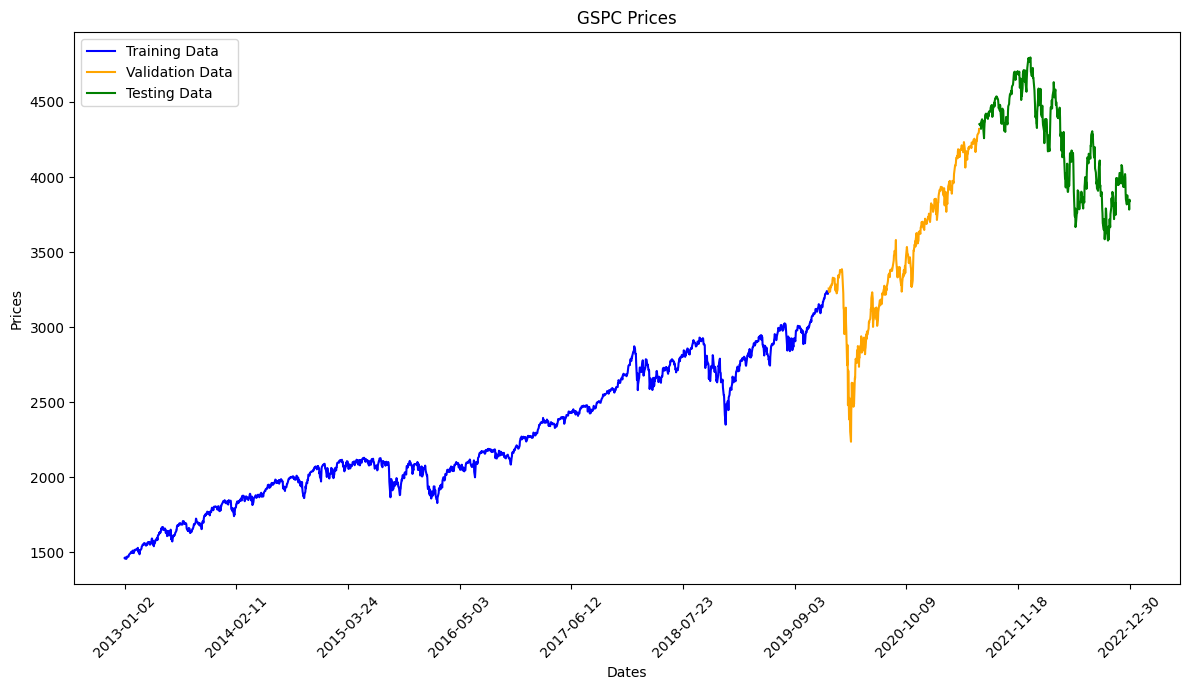

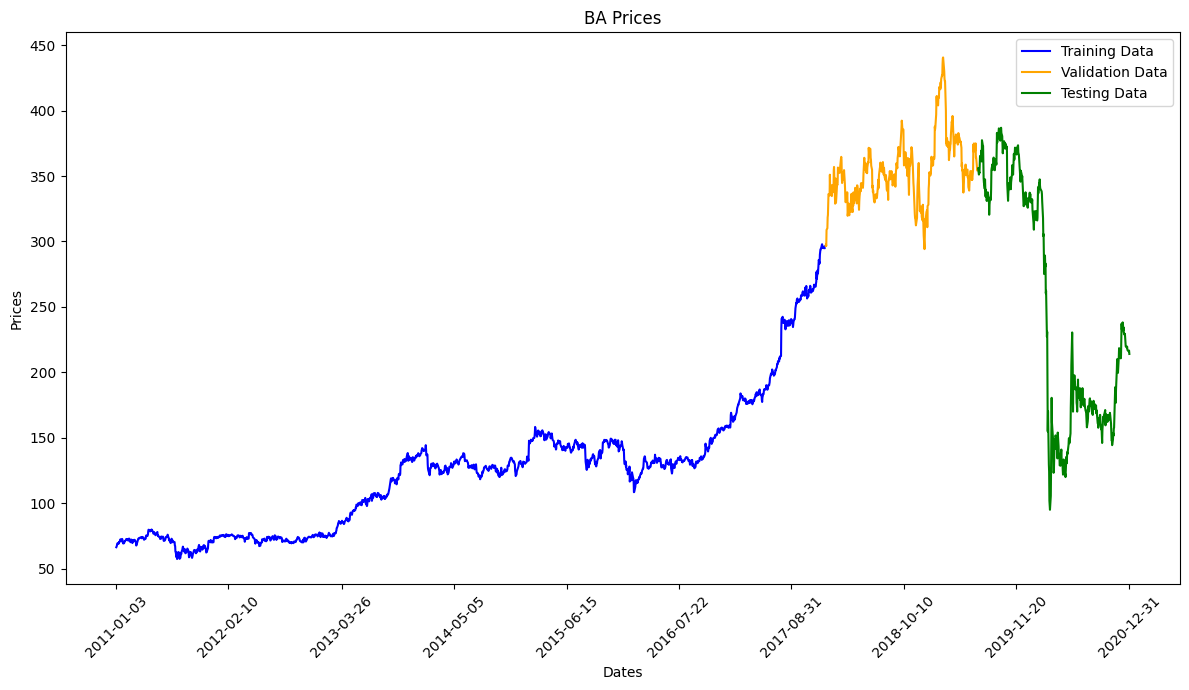

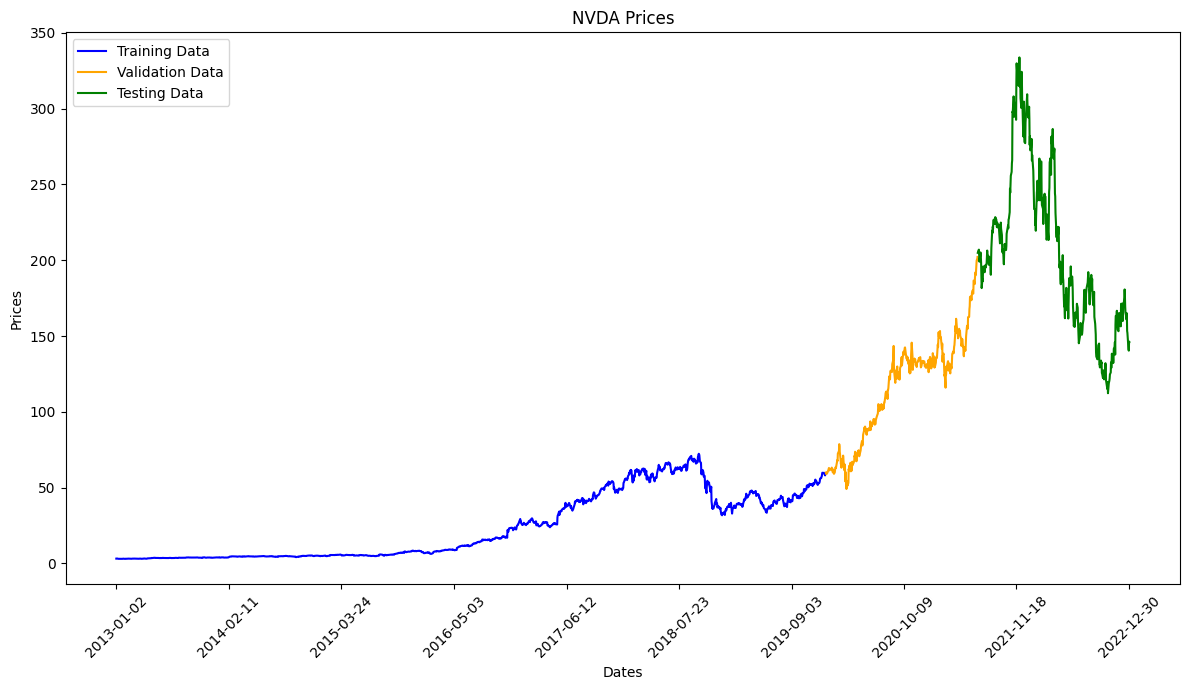

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

datasets = {
    'GSPC': gspc_data,
    'BA': ba_data,
    'NVDA': nvda_data
}

for name, df in datasets.items():
    train_data, interim_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
    val_data, test_data = interim_data[0:int(len(interim_data)*0.5)], interim_data[int(len(interim_data)*0.5):]

    plt.figure(figsize=(12,7))
    plt.title(f'{name} Prices')
    plt.xlabel('Dates')
    plt.ylabel('Prices')
    plt.plot(df.index[:len(train_data)], train_data['Close'], 'blue', label='Training Data')
    plt.plot(df.index[len(train_data):len(train_data)+len(val_data)], val_data['Close'], 'orange', label='Validation Data')
    plt.plot(df.index[len(train_data)+len(val_data):], test_data['Close'], 'green', label='Testing Data')

    # Modify the ticks to make them spread out:
    num_ticks = 10
    ticks_to_use = np.linspace(0, len(df)-1, num_ticks).astype(int)
    plt.xticks(df.index[ticks_to_use], rotation=45)

    plt.legend()
    plt.tight_layout()  # Ensures the plot fits within the figure
    plt.show()

# Model building

## ARIMA model building

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

# ARIMA datasets with training + validation data combined
arima_datasets = {'GSPC': pd.concat([A_gspc_train, A_gspc_val]),
                  'BA': pd.concat([A_ba_train, A_ba_val]),
                  'NVDA': pd.concat([A_nvda_train, A_nvda_val])}

arima_models = {}

for name, dataset in arima_datasets.items():
    series_data = dataset['Close'].values
    stepwise_model = auto_arima(series_data, start_p=1, start_d=1, start_q=1,  # Ensure that d can start from 1
                                max_p=5, max_d=2, max_q=5, seasonal=False,  # Allow d to be up to 2
                                trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)
    model = ARIMA(series_data, order=stepwise_model.order)
    model_fit = model.fit()
    arima_models[name] = model_fit
    print(f"Optimal parameters for {name}: p={stepwise_model.order[0]}, d={stepwise_model.order[1]}, q={stepwise_model.order[2]}")

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=20260.168, Time=2.28 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=20343.993, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=20269.669, Time=0.30 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=20283.716, Time=0.70 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=20346.824, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=20252.944, Time=1.58 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=20251.943, Time=0.32 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=20251.445, Time=0.51 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=20241.636, Time=0.68 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=20241.395, Time=1.08 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=20174.224, Time=10.69 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=20176.008, Time=10.04 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=20180.002, Time=11.52 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=20154.064, Time=16.82 sec
 ARIMA(3,1,2)(0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimal parameters for GSPC: p=3, d=1, q=2
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=11128.472, Time=1.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11125.556, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11127.556, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11127.556, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11127.203, Time=0.06 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.914 seconds
Optimal parameters for BA: p=0, d=1, q=0
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.07 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=9888.782, Time=0.09 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=8998.803, Time=0.14 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.42 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=9886.782, Time=0.07 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=8703.730, Time=0.33 sec
 ARIMA(3,2,0)(0,0,0)[0] intercep

## LSTM model building

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import Adam

def build_lstm_model(input_shape, dropout_rate=0.2):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=input_shape, dropout=dropout_rate))
    model.add(LSTM(50, return_sequences=False, dropout=dropout_rate))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.00001), loss='mean_squared_error')
    return model

lstm_train_datasets = {
    'GSPC': (X_gspc_train, Y_gspc_train, X_gspc_val, Y_gspc_val, X_gspc_test, Y_gspc_test),
    'BA': (X_ba_train, Y_ba_train, X_ba_val, Y_ba_val, X_ba_test, Y_ba_test),
    'NVDA': (X_nvda_train, Y_nvda_train, X_nvda_val, Y_nvda_val, X_nvda_test, Y_nvda_test)
}

lstm_models = {}

# Define an early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

for name, (X_train, Y_train, X_val, Y_val, X_test, Y_test) in lstm_train_datasets.items():
    model = build_lstm_model((X_train.shape[1], 1))
    model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_val, Y_val), callbacks=[early_stopping])
    lstm_models[name] = model

Epoch 1/50
54/54 [==============================] - 11s 34ms/step - loss: 0.0765 - val_loss: 0.3561
Epoch 2/50
54/54 [==============================] - 0s 9ms/step - loss: 0.0610 - val_loss: 0.2933
Epoch 3/50
54/54 [==============================] - 1s 10ms/step - loss: 0.0470 - val_loss: 0.2349
Epoch 4/50
54/54 [==============================] - 1s 9ms/step - loss: 0.0347 - val_loss: 0.1789
Epoch 5/50
54/54 [==============================] - 1s 10ms/step - loss: 0.0235 - val_loss: 0.1275
Epoch 6/50
54/54 [==============================] - 1s 10ms/step - loss: 0.0142 - val_loss: 0.0827
Epoch 7/50
54/54 [==============================] - 0s 9ms/step - loss: 0.0078 - val_loss: 0.0488
Epoch 8/50
54/54 [==============================] - 1s 10ms/step - loss: 0.0041 - val_loss: 0.0279
Epoch 9/50
54/54 [==============================] - 1s 10ms/step - loss: 0.0025 - val_loss: 0.0178
Epoch 10/50
54/54 [==============================] - 0s 9ms/step - loss: 0.0022 - val_loss: 0.0131
Epoch 11/50


# Evaluation and Visualisation

The test dataset will be split into different sizes representing a different number of 'trading days'. The first consists of 5 datapoints representing a week, the second consists of 20 datapoints representing a month, third is 120 datapoints representing 6 months, and finally 240 datapoints representing a trading year.

Both models are evaluated on Root Mean Squared Error (RMSE) which measures how close the predicted value is to real value, R-squared which evaluates the models ability to encapsulate trends, and Mean Absolute Percentage Error (MAPE) which provides percentage-based error, giving understanding of average error size relative to values.

In [ ]:
# Evaluation metric function

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
# Dictionary containing original data
data_dict = {'GSPC': gspc_data, 'BA': ba_data, 'NVDA': nvda_data}

## ARIMA Evaluation and Visualisation

In [ ]:
arima_test_datasets = {
    'GSPC': A_gspc_test,
    'BA': A_ba_test,
    'NVDA': A_nvda_test
}

Evaluating GSPC dataset...
For GSPC with 5 points:
RMSE: 33.53
R-Squared: -3.19
MAPE: 0.67%



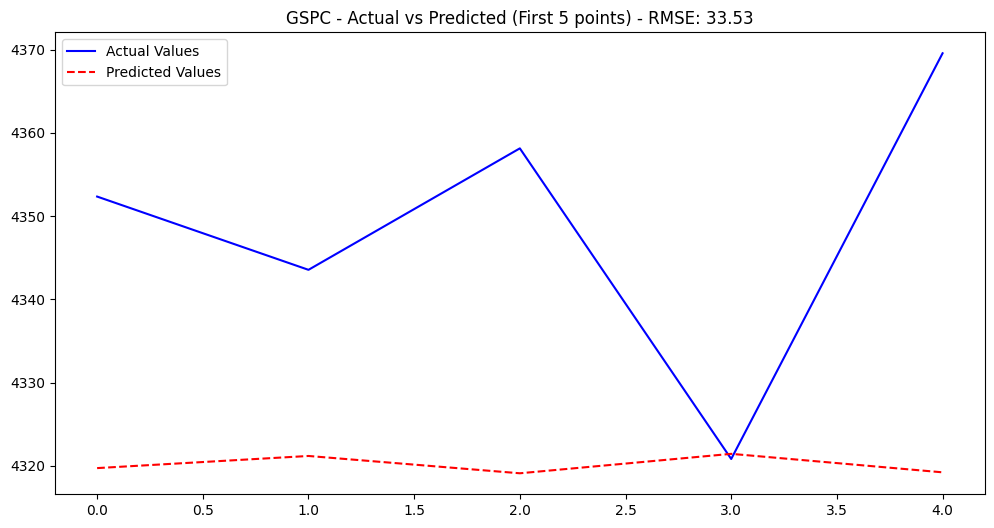

For GSPC with 20 points:
RMSE: 59.77
R-Squared: -1.41
MAPE: 1.19%



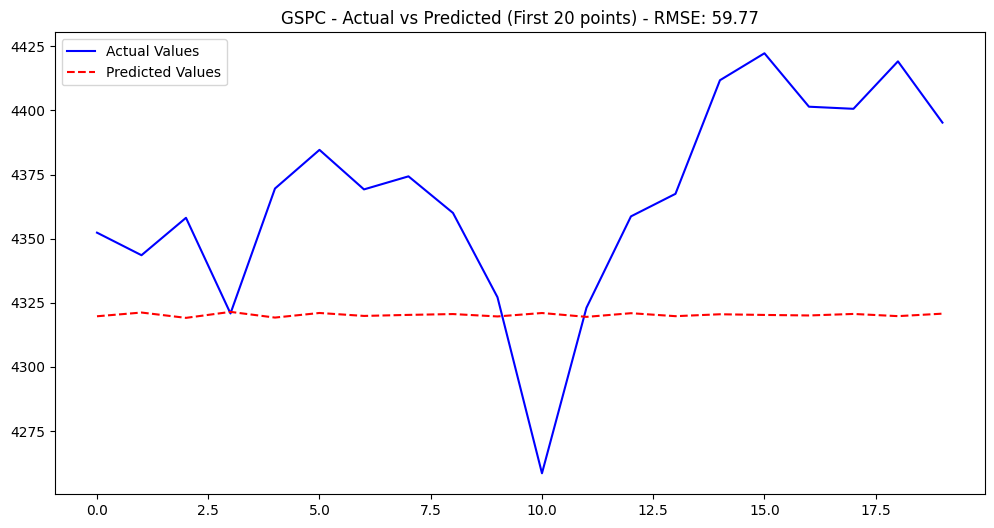

For GSPC with 120 points:
RMSE: 216.43
R-Squared: -2.13
MAPE: 3.94%



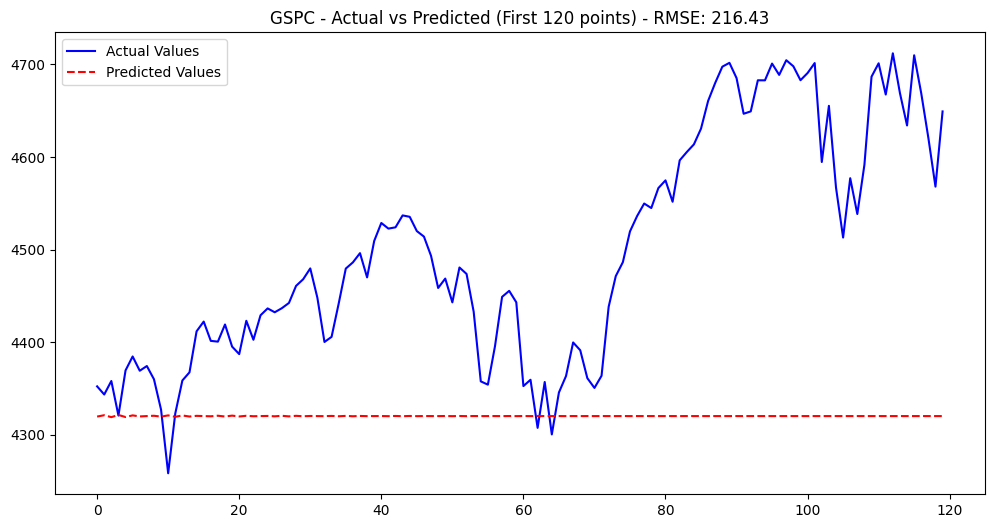

For GSPC with 240 points:
RMSE: 234.53
R-Squared: -0.27
MAPE: 4.38%



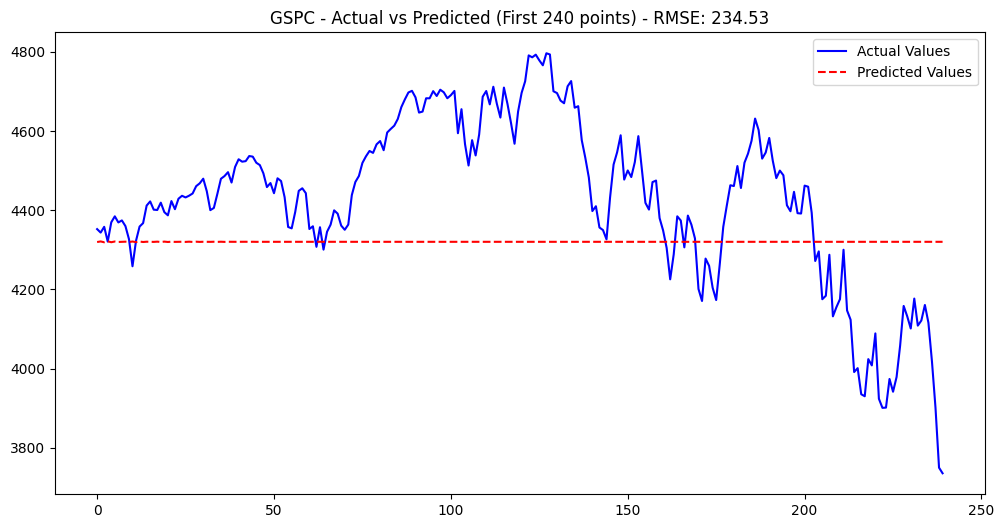

Evaluating BA dataset...
For BA with 5 points:
RMSE: 2.84
R-Squared: -0.00
MAPE: 0.72%



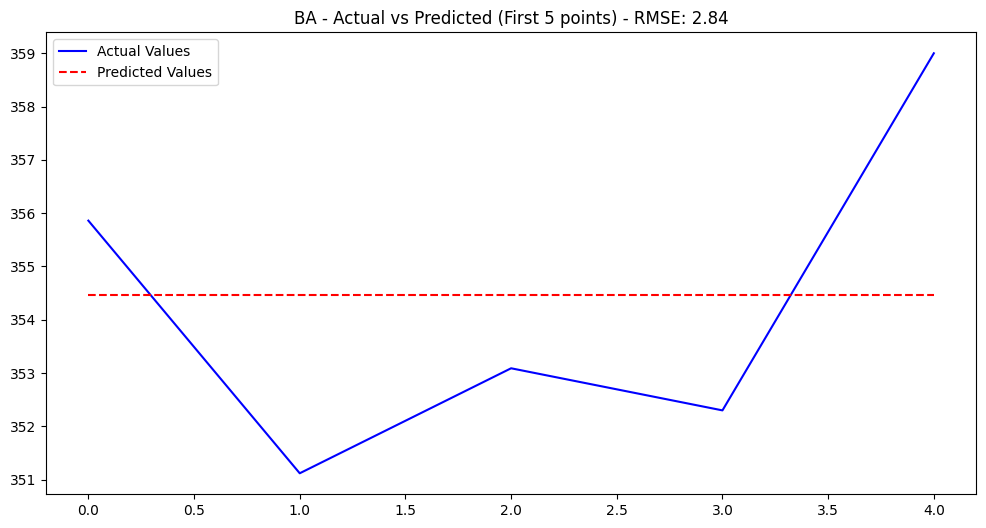

For BA with 20 points:
RMSE: 11.82
R-Squared: -0.04
MAPE: 2.78%



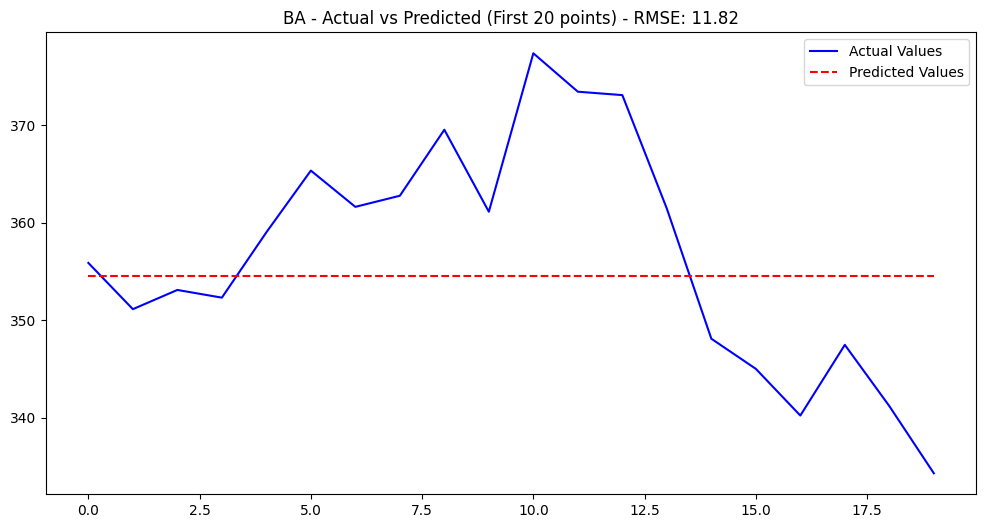

For BA with 120 points:
RMSE: 16.92
R-Squared: -0.02
MAPE: 4.06%



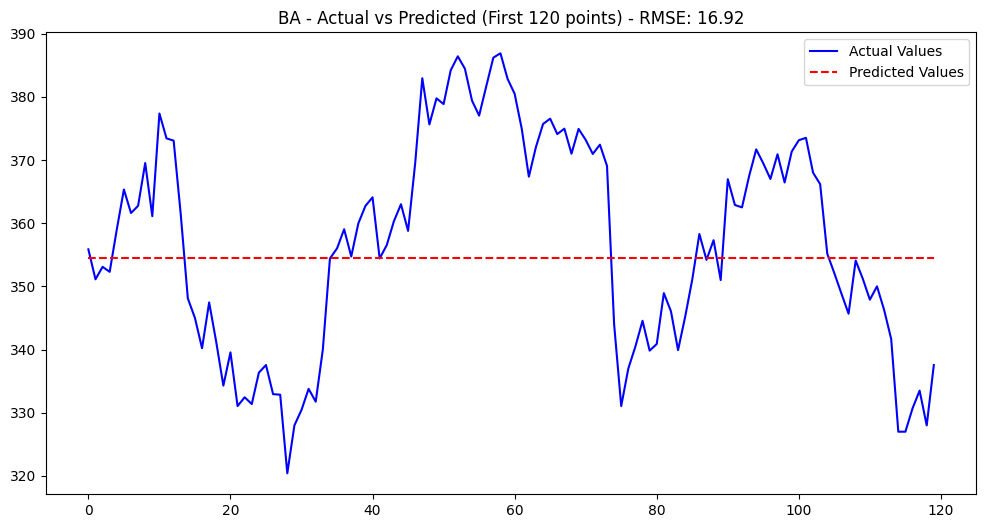

For BA with 240 points:
RMSE: 114.47
R-Squared: -0.49
MAPE: 47.35%



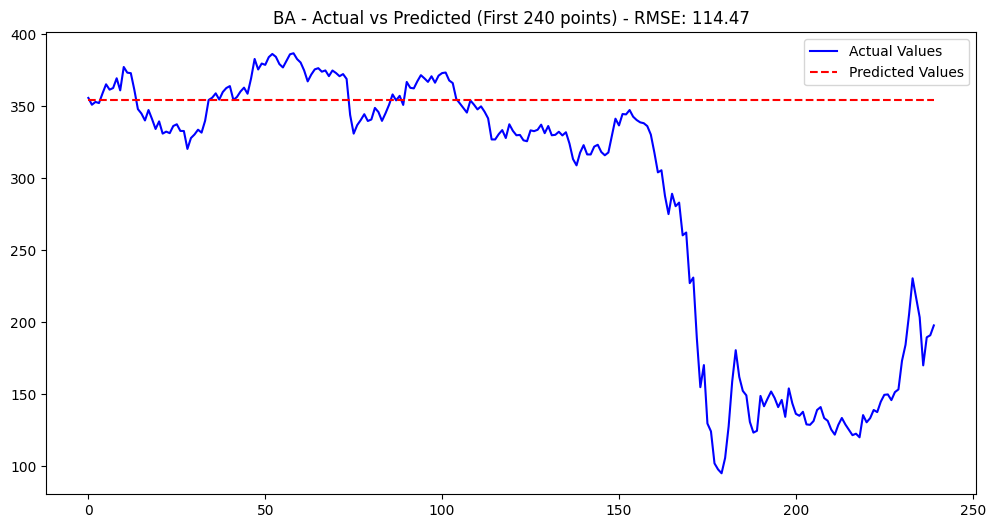

Evaluating NVDA dataset...
For NVDA with 5 points:
RMSE: 7.07
R-Squared: -4.96
MAPE: 2.78%



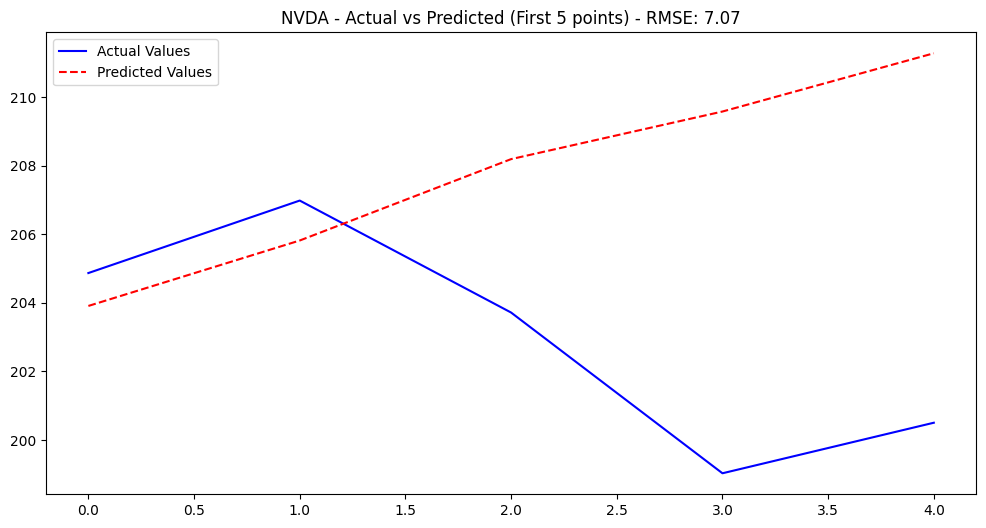

For NVDA with 20 points:
RMSE: 29.25
R-Squared: -18.85
MAPE: 13.12%



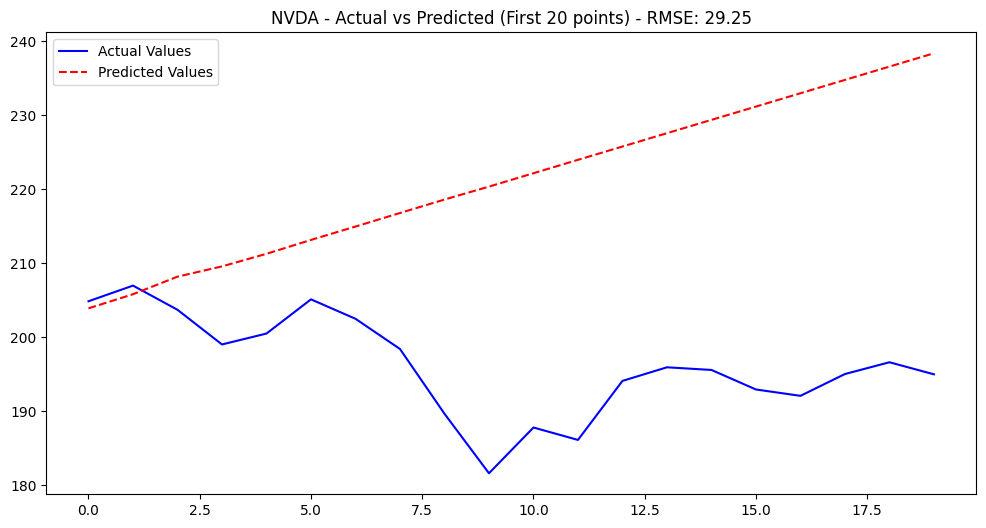

For NVDA with 120 points:
RMSE: 80.21
R-Squared: -2.22
MAPE: 30.84%



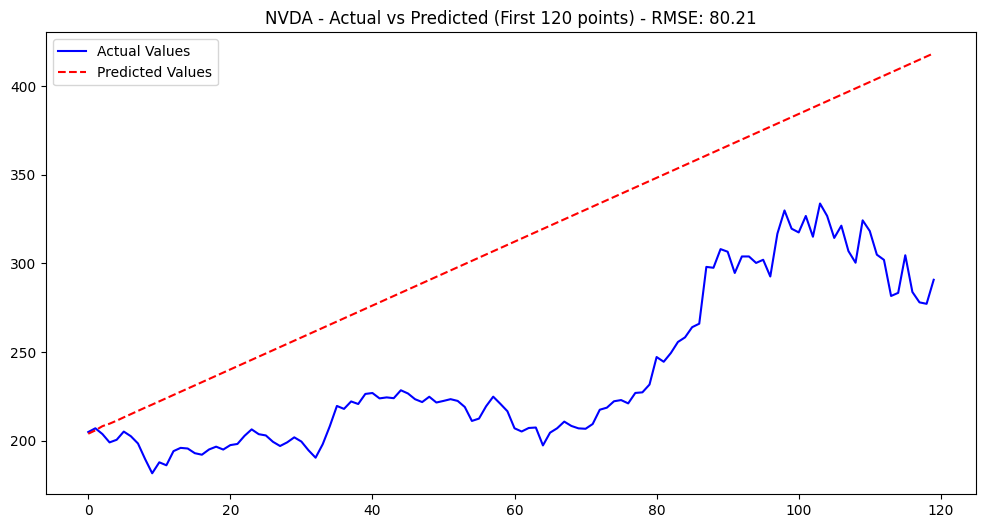

For NVDA with 240 points:
RMSE: 228.82
R-Squared: -27.87
MAPE: 86.08%



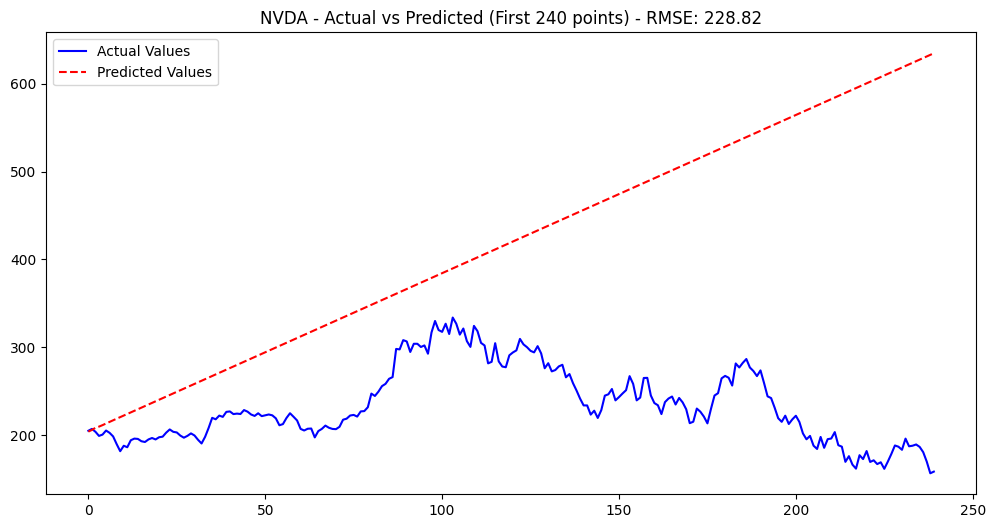

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_arima_predictions(model_fit, test_data, n_points):
    # Make predictions using the ARIMA model
    forecast = model_fit.forecast(steps=n_points)
    actual = test_data['Close'].values[:n_points]

    # Calculate metrics
    mse = mean_squared_error(actual, forecast)
    rmse = np.sqrt(mse)
    r2 = r2_score(actual, forecast)
    mape = mean_absolute_percentage_error(actual, forecast)

    return forecast, actual, rmse, r2, mape

# Test data sizes to evaluate
test_sizes = [5, 20, 120, 240]

# Iterate over the datasets and test sizes
for name, test_data in arima_test_datasets.items():
    print(f"Evaluating {name} dataset...")

    for size in test_sizes:
        forecast, actual, rmse, r2, mape = evaluate_arima_predictions(arima_models[name], test_data, size)

        # Print metrics
        print(f"For {name} with {size} points:")
        print(f"RMSE: {rmse:.2f}")
        print(f"R-Squared: {r2:.2f}")
        print(f"MAPE: {mape:.2f}%\n")

        # Plot
        plt.figure(figsize=(12, 6))
        plt.plot(actual, label="Actual Values", color='blue')
        plt.plot(forecast, label="Predicted Values", color='red', linestyle='--')
        plt.title(f"{name} - Actual vs Predicted (First {size} points) - RMSE: {rmse:.2f}")
        plt.legend()
        plt.show()

### Visualisation of trading 'year' prediction vs real values

In [ ]:
from sklearn.metrics import r2_score

A_predictions_240 = {}  # Dictionary to store predictions for 240 data points
A_metrics_240 = {}  # Dictionary to store metrics for the 240 data points predictions

for name, model_fit in arima_models.items():

    # Predicting using ARIMA model for 240 data points
    predictions1, actual, rmse, r2, mape = evaluate_arima_predictions(model_fit, arima_test_datasets[name], 240)

    # Store predictions
    A_predictions_240[name] = predictions1

    # Store metrics
    A_metrics_240[name] = {'RMSE': rmse, 'R2': r2, 'MAPE': mape}

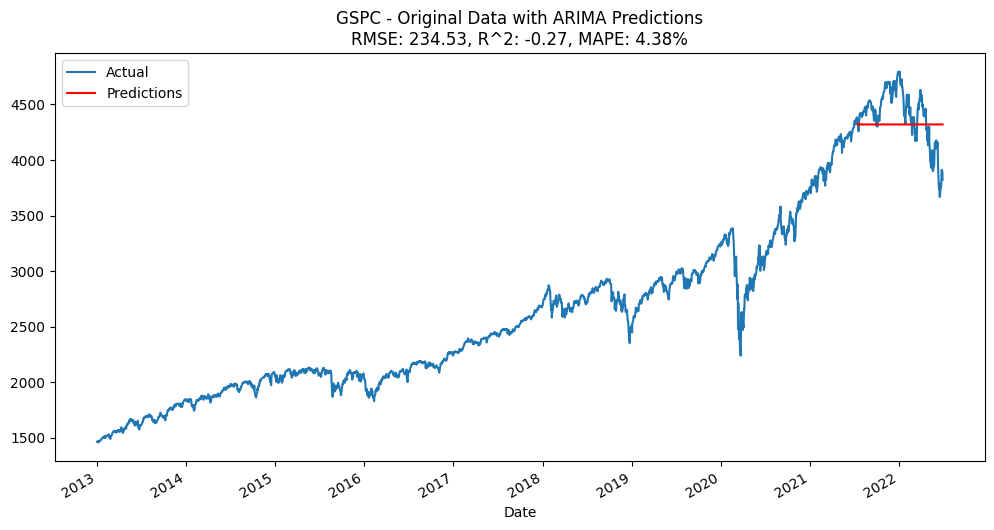

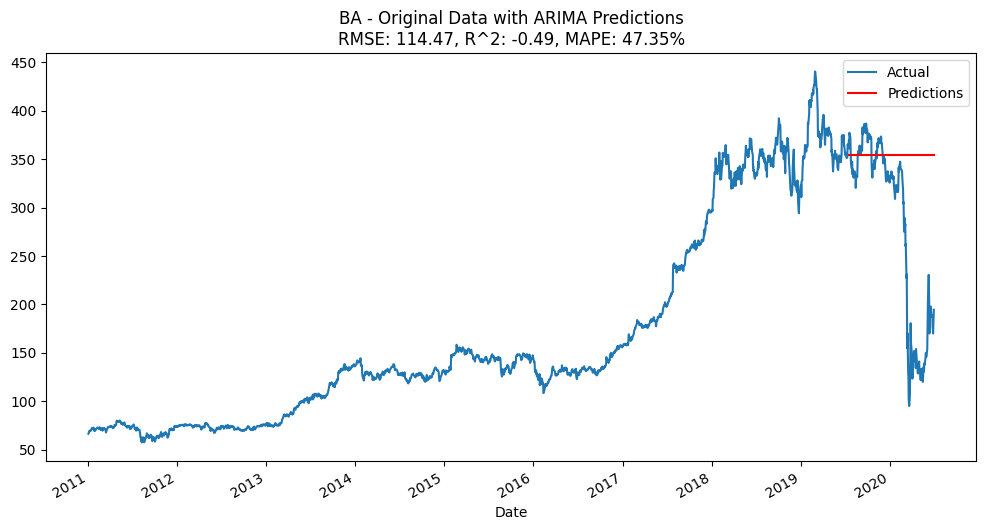

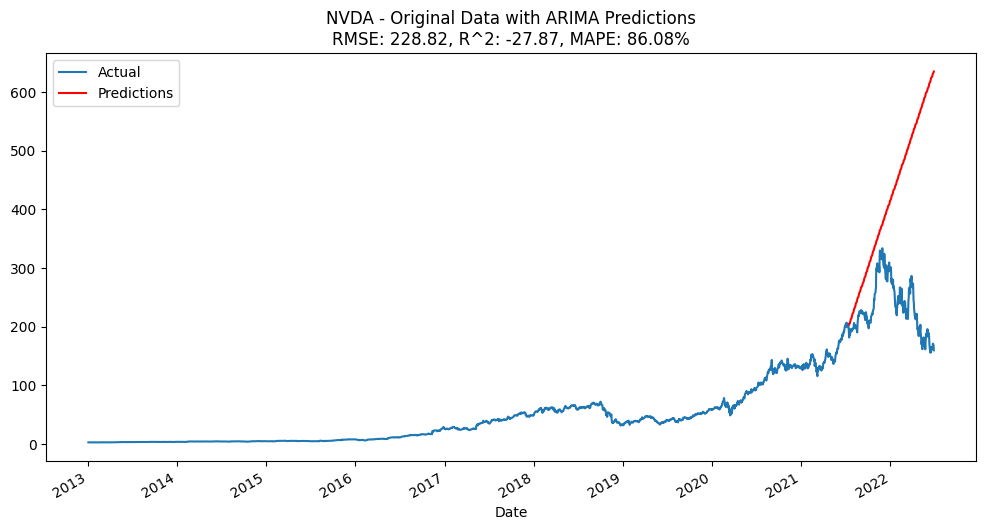

In [ ]:
for name, data in data_dict.items():
    plt.figure(figsize=(12,6))

    # Plot the original data (excluding last 129 data points)
    data['Close'][:-129].plot(label='Actual', ax=plt.gca())

    # Get the starting index for the predictions overlay
    start_idx = len(data) - 369  # 240 predicted points + 129 non-predicted points

    # Overlay the predictions for the 240 data points
    predicted_data = pd.Series(A_predictions_240[name], index=data.index[start_idx:start_idx+240])
    predicted_data.plot(color='red', ax=plt.gca(), label='Predictions')

    # Add title and legend
    metrics_text = f"RMSE: {A_metrics_240[name]['RMSE']:.2f}, R^2: {A_metrics_240[name]['R2']:.2f}, MAPE: {A_metrics_240[name]['MAPE']:.2f}%"
    plt.title(f"{name} - Original Data with ARIMA Predictions\n{metrics_text}")
    plt.legend()

    plt.show()

## LSTM Evaluation and Visualisation

1/1 [==============================] - 1s 999ms/step
Evaluation for GSPC for 5 datapoints:
RMSE: 38.113821380093995
R-squared: 0.012064476852441053
MAPE: 0.7840506032785087%


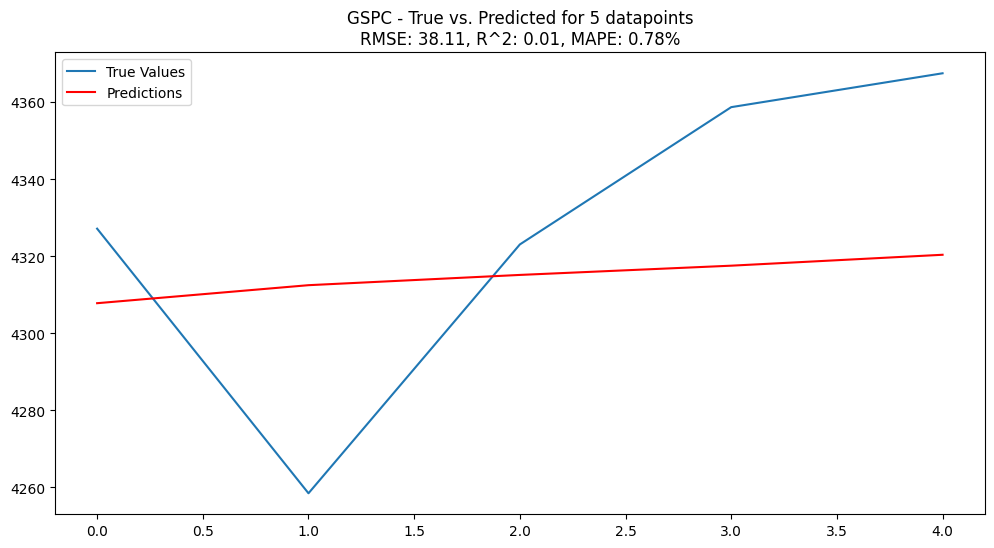

1/1 [==============================] - 0s 24ms/step
Evaluation for GSPC for 20 datapoints:
RMSE: 60.61948061505811
R-squared: -0.6108468807190552
MAPE: 1.2930969439086786%


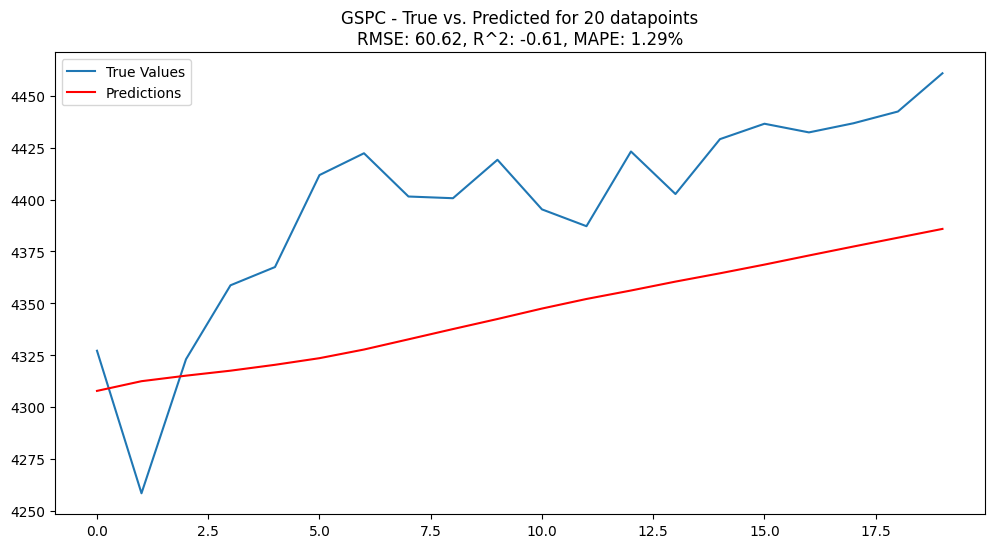

4/4 [==============================] - 0s 5ms/step
Evaluation for GSPC for 120 datapoints:
RMSE: 97.41258960700216
R-squared: 0.4759670835484351
MAPE: 1.8260229649964395%


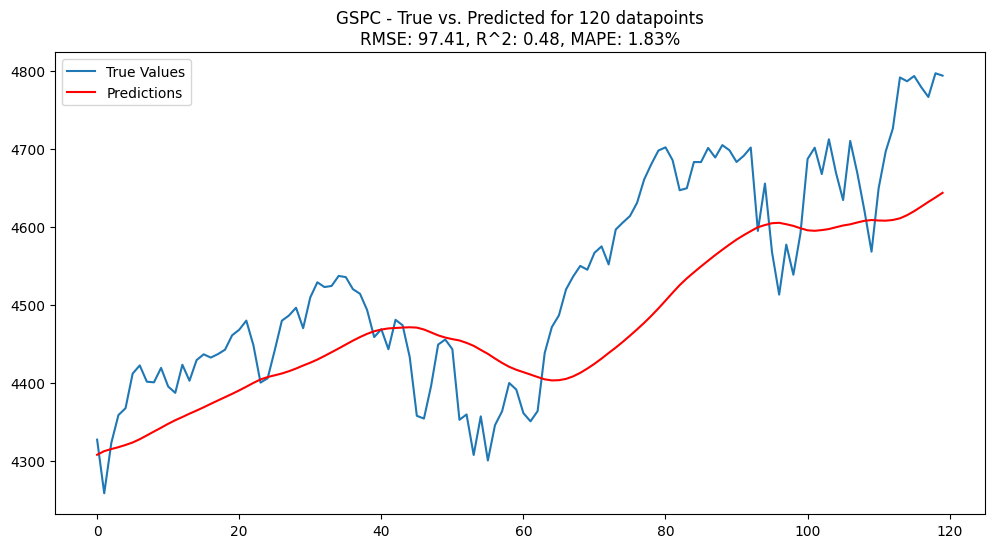

8/8 [==============================] - 0s 6ms/step
Evaluation for GSPC for 240 datapoints:
RMSE: 144.49085582221423
R-squared: 0.6419614865485872
MAPE: 2.6536454746466718%


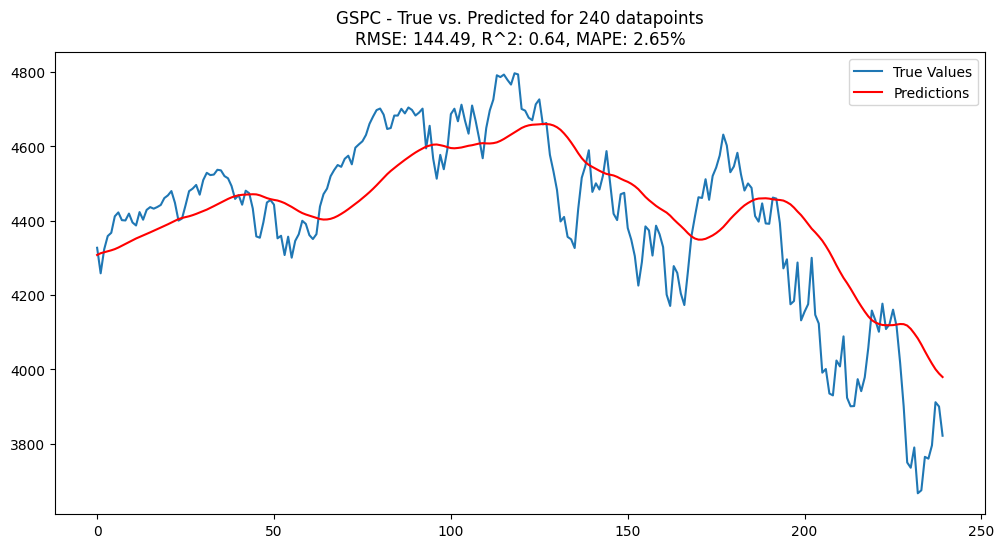

1/1 [==============================] - 1s 657ms/step
Evaluation for BA for 5 datapoints:
RMSE: 10.188532997065728
R-squared: -1.3051472565048758
MAPE: 2.152460390581458%


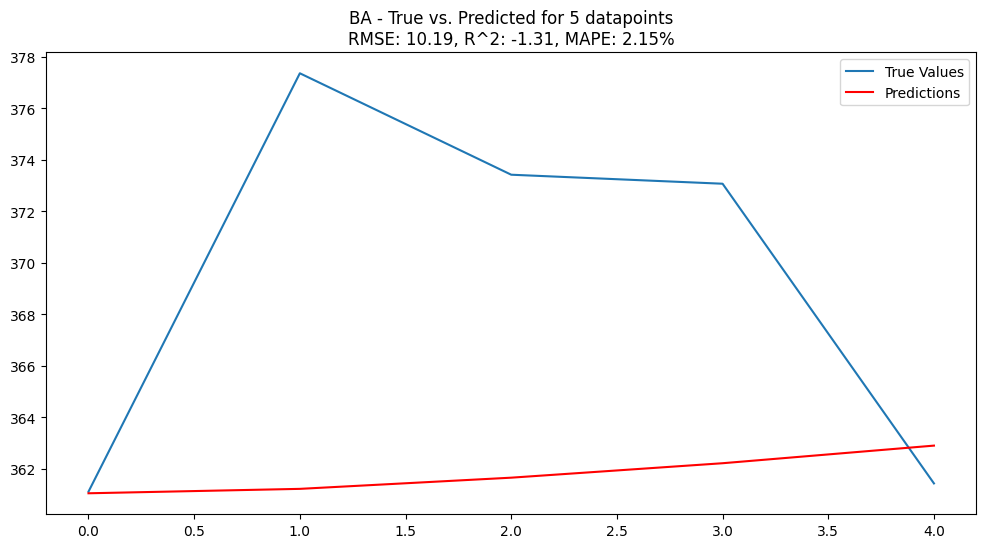

1/1 [==============================] - 0s 23ms/step
Evaluation for BA for 20 datapoints:
RMSE: 19.841703964308383
R-squared: -0.5958505851477958
MAPE: 5.379806650741504%


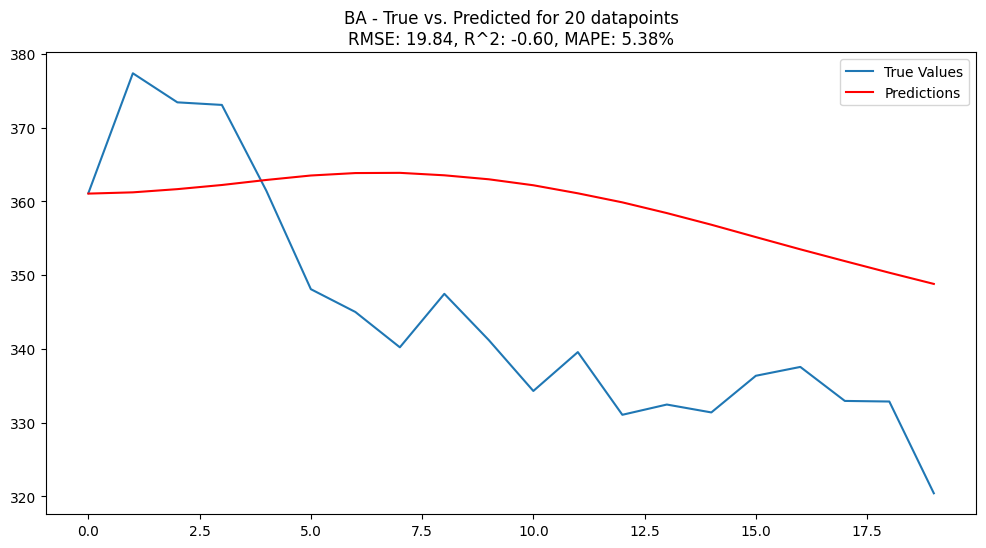

4/4 [==============================] - 0s 6ms/step
Evaluation for BA for 120 datapoints:
RMSE: 18.408689771790364
R-squared: -0.049139897647897834
MAPE: 4.546889886100171%


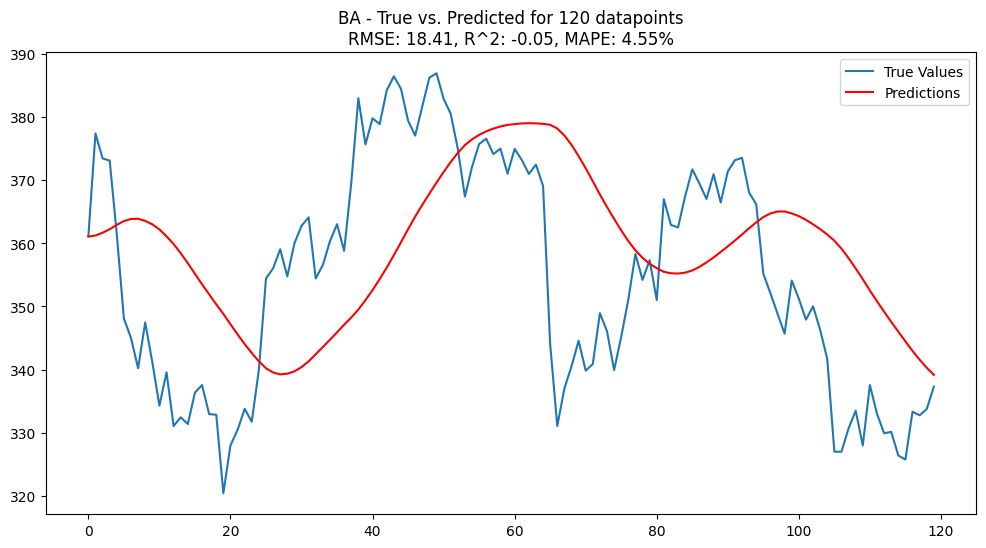

8/8 [==============================] - 0s 5ms/step
Evaluation for BA for 240 datapoints:
RMSE: 36.99262770494419
R-squared: 0.8470812001584569
MAPE: 12.206945469413327%


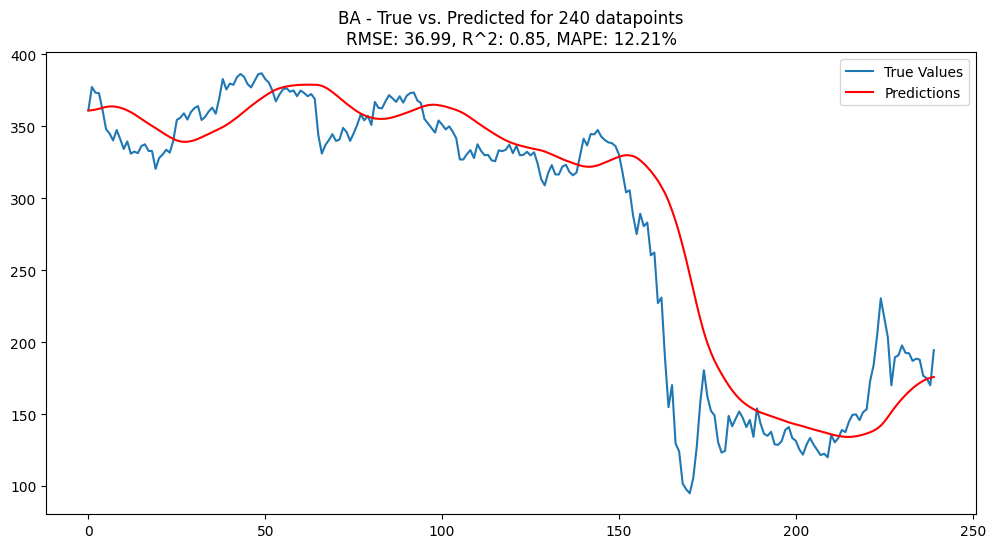

1/1 [==============================] - 1s 654ms/step
Evaluation for NVDA for 5 datapoints:
RMSE: 11.806565207196327
R-squared: -4.0336978960887855
MAPE: 5.764746135381371%


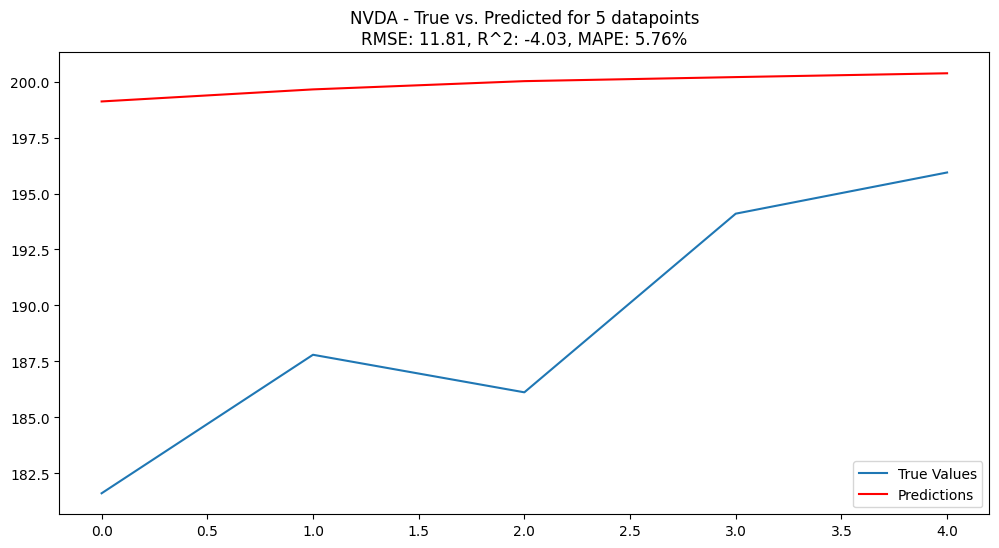

1/1 [==============================] - 0s 21ms/step
Evaluation for NVDA for 20 datapoints:
RMSE: 7.394041467462231
R-squared: -0.5819142767645531
MAPE: 3.177007831359856%


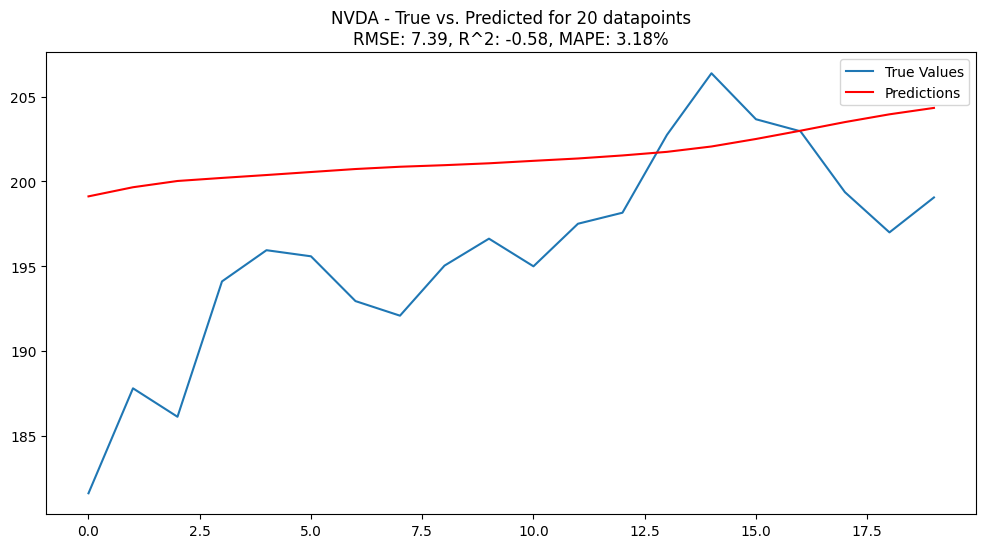

4/4 [==============================] - 0s 5ms/step
Evaluation for NVDA for 120 datapoints:
RMSE: 22.616849914309277
R-squared: 0.757656779636211
MAPE: 6.215240105488344%


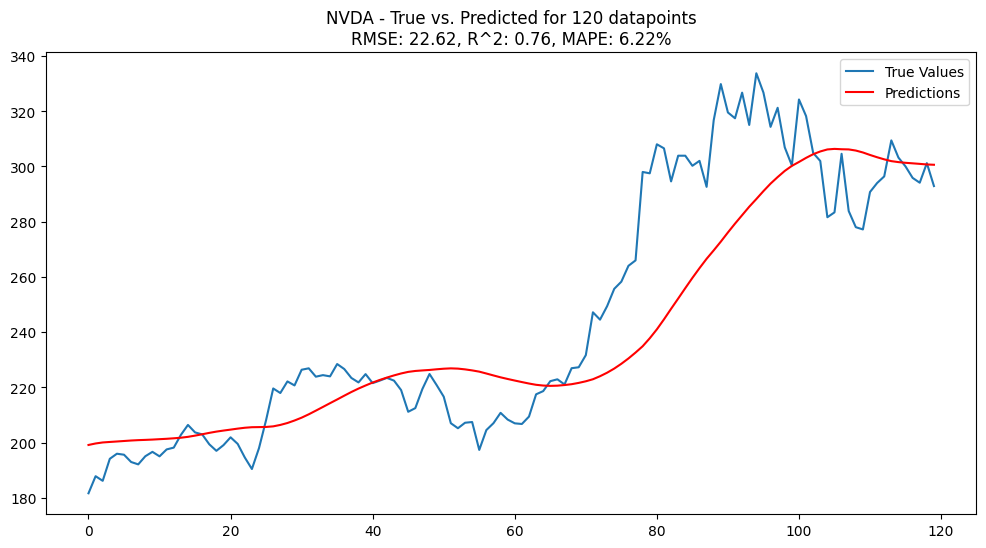

8/8 [==============================] - 0s 6ms/step
Evaluation for NVDA for 240 datapoints:
RMSE: 27.39800573190168
R-squared: 0.6165663879994354
MAPE: 9.690936937508848%


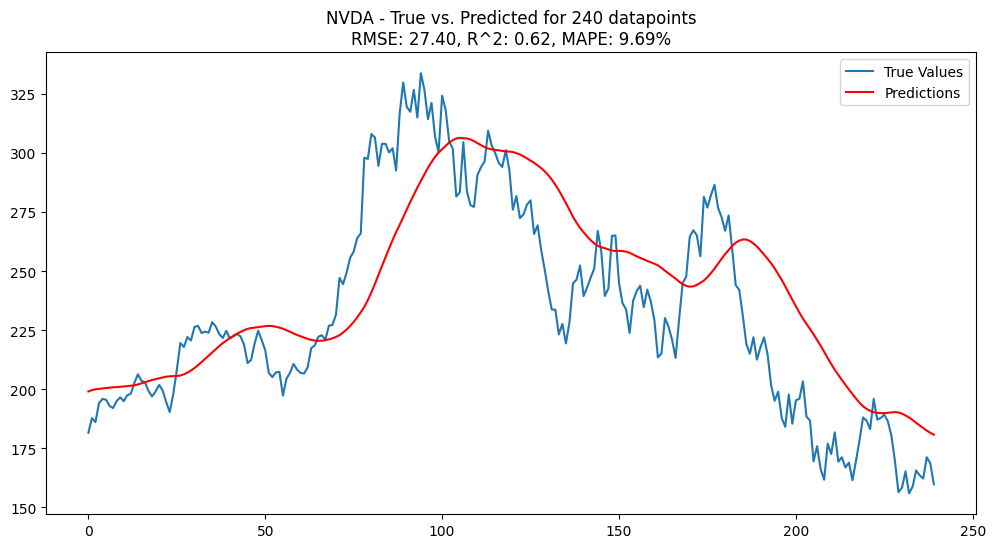

In [ ]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Evaluation function
def evaluate_model(name, true_values, predicted_values, title_suffix=""):
    rmse = np.sqrt(mean_squared_error(true_values, predicted_values))
    r2 = r2_score(true_values, predicted_values)
    mape = mean_absolute_percentage_error(true_values, predicted_values)

    print(f'Evaluation for {name} {title_suffix}:')
    print(f'RMSE: {rmse}')
    print(f'R-squared: {r2}')
    print(f'MAPE: {mape}%')

    plt.figure(figsize=(12,6))
    plt.plot(true_values, label='True Values')
    plt.plot(predicted_values, color='red', label='Predictions')
    title = f'{name} - True vs. Predicted {title_suffix}\nRMSE: {rmse:.2f}, R^2: {r2:.2f}, MAPE: {mape:.2f}%'
    plt.title(title)
    plt.legend()
    plt.show()

# Dictionary of scalers for each dataset to inverse transform
scalers = {'GSPC': scaler_gspc, 'BA': scaler_ba, 'NVDA': scaler_nvda}

# Predict and evaluate for each LSTM model:
lstm_test_datasets = {'GSPC': (X_gspc_test, Y_gspc_test),
                      'BA': (X_ba_test, Y_ba_test),
                      'NVDA': (X_nvda_test, Y_nvda_test)}

evaluation_sizes = [5, 20, 120, 240]

for stock_name, lstm_model in lstm_models.items():
    X_test_data, y_test_data = lstm_test_datasets[stock_name]

    for size in evaluation_sizes:
        # Slice the test data according to the current size
        X_test_subset = X_test_data[:size]

        # Make predictions using the LSTM model
        predicted_values_scaled = lstm_model.predict(X_test_subset)

        # Convert the scaled predictions back to their original scale
        predicted_values = scalers[stock_name].inverse_transform(predicted_values_scaled)

        # Also reverse scaling for the actual test labels
        y_test_subset = y_test_data[:size]
        actual_values = scalers[stock_name].inverse_transform(y_test_subset)

        # Evaluate the predictions against the actual values
        evaluate_model(stock_name, actual_values, predicted_values, title_suffix=f"for {size} datapoints")

### Visualisation of trading 'year' prediction vs real values

In [ ]:
# Storing predictions for 240 data points
predictions_240 = {}
# Storing metrics for 240 data points
metrics_240 = {}

for stock_name, lstm_model in lstm_models.items():
    X_test_data, y_test_data_original = lstm_test_datasets[stock_name]

    # Get the first 240 points from the test data
    X_test_subset = X_test_data[:240]

    # Predict using the model
    predicted_values_scaled = lstm_model.predict(X_test_subset)
    predicted_values = scalers[stock_name].inverse_transform(predicted_values_scaled)

    # Reverse scaling for the true values
    y_test_subset = y_test_data_original[:240]
    actual_values = scalers[stock_name].inverse_transform(y_test_subset)

    # Store the predictions
    predictions_240[stock_name] = predicted_values.flatten()

    # Calculate and store metrics
    rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))
    r2 = r2_score(actual_values, predicted_values)
    mape = mean_absolute_percentage_error(actual_values, predicted_values)
    metrics_240[stock_name] = {'RMSE': rmse, 'R2': r2, 'MAPE': mape}

8/8 [==============================] - 0s 5ms/step


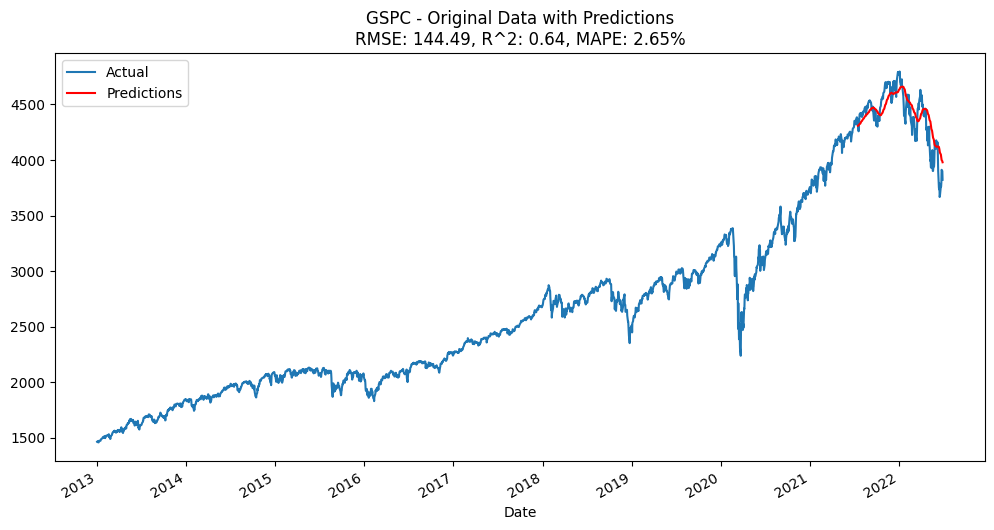

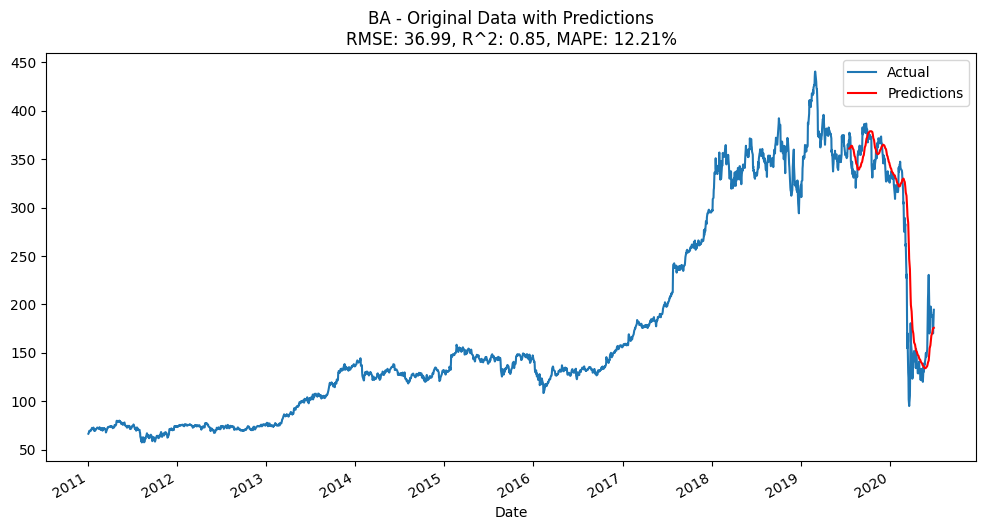

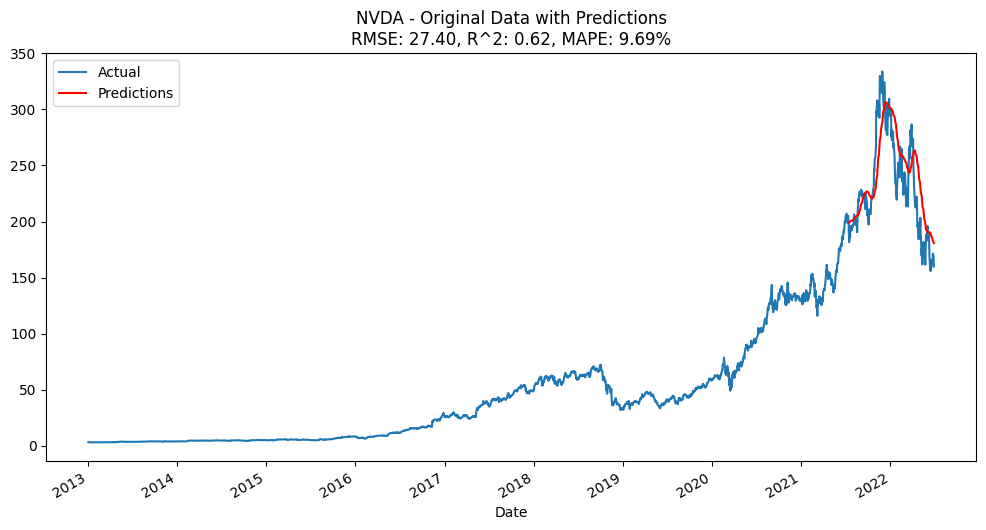

In [ ]:
for name, data in data_dict.items():
    plt.figure(figsize=(12,6))

    # Plot the original data (excluding last 129 data points)
    data['Close'][:-129].plot(label='Actual', ax=plt.gca())

    # Get the starting index for the predictions overlay
    start_idx = len(data) - 369  # 240 predicted points + 129 non-predicted points

    # Overlay the predictions for the 240 data points
    predicted_data = pd.Series(predictions_240[name], index=data.index[start_idx:start_idx+240])
    predicted_data.plot(color='red', ax=plt.gca(), label='Predictions')

    # Add title and legend
    metrics_text = f"RMSE: {metrics_240[name]['RMSE']:.2f}, R^2: {metrics_240[name]['R2']:.2f}, MAPE: {metrics_240[name]['MAPE']:.2f}%"
    plt.title(f"{name} - Original Data with Predictions\n{metrics_text}")
    plt.legend()

    plt.show()